In [2]:
# import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [3]:
# build a simple CNN model
model = models.Sequential([
    layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes for digits 0-9
])

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
# train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.2f}")

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 16ms/step - accuracy: 0.8927 - loss: 0.3594 - val_accuracy: 0.9802 - val_loss: 0.0717
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.9813 - loss: 0.0620 - val_accuracy: 0.9832 - val_loss: 0.0604
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 39s 16ms/step - accuracy: 0.9882 - loss: 0.0388 - val_accuracy: 0.9857 - val_loss: 0.0515
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - accuracy: 0.9909 - loss: 0.0277 - val_accuracy: 0.9860 - val_loss: 0.0545
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9936 - loss: 0.0205 - val_accuracy: 0.9875 - val_loss: 0.0530
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9830 - loss: 0.0604

Test Accuracy: 0.9860


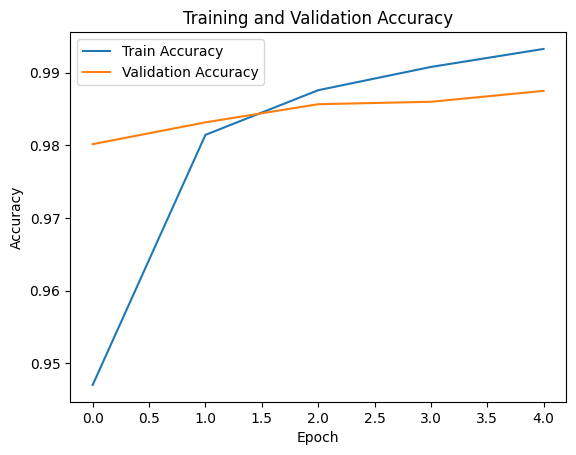

In [5]:

# plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()